## Mitesh Kumar Chaudhary

### Decision Tree Algorithm - Iris Data Analysis

### Import Libraries

In [111]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from pickle import dump
from pickle import load

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [13]:
iris = pd.read_csv("Iris.csv")

In [15]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Understanding

In [16]:
iris.shape

(150, 6)

In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Preparation

In [23]:
iris.drop(labels="Id",axis=1,inplace=True)

In [24]:
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
iris.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [29]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

### Model Building

In [70]:
X = iris.drop(labels=["Species"],axis=1)
y = iris[["Species"]]

In [71]:
scaler = StandardScaler()

In [72]:
X_scaled = scaler.fit_transform(X)

In [73]:
X = pd.DataFrame(data=X_scaled,columns=X.columns)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Model Training

In [78]:
dt_model = DecisionTreeClassifier()

In [79]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
dt_model.feature_importances_

array([0.01671193, 0.01253395, 0.04773381, 0.92302032])

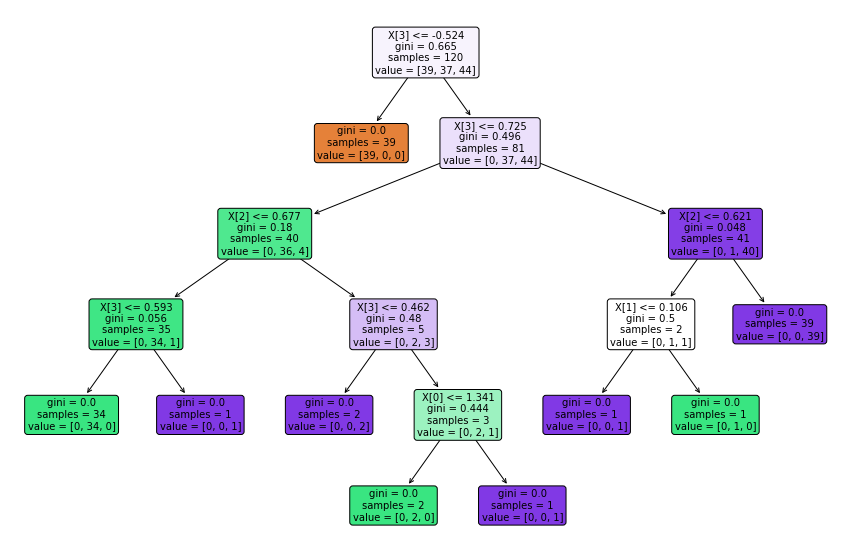

In [103]:
plt.figure(figsize=(15,10))
plot_tree(dt_model,max_depth=None,rounded=True,filled=True,fontsize=10)
plt.show()

### Model Testing

In [90]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

In [91]:
y_pred_train = pd.DataFrame(y_pred_train,columns=["Species"])
y_pred_test = pd.DataFrame(y_pred_test,columns=["Species"])

In [92]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

### Model Evaluation

##### Train Data

In [95]:
print("Accuracy Score        : ",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix      : \n",confusion_matrix(y_train,y_pred_train))
print("Classification Report : \n",classification_report(y_train,y_pred_train))

Accuracy Score        :  1.0
Confusion Matrix      : 
 [[39  0  0]
 [ 0 37  0]
 [ 0  0 44]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



### Test Data

In [96]:
print("Accuracy Score        : ",accuracy_score(y_test,y_pred_test))
print("Confusion Matrix      : \n",confusion_matrix(y_test,y_pred_test))
print("Classification Report : \n",classification_report(y_test,y_pred_test))

Accuracy Score        :  1.0
Confusion Matrix      : 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Data Deployement

In [105]:
dump(dt_model,open('dt_model_iris_data.pkl','wb'))

In [107]:
dt_pickle_file = load(open('dt_model_iris_data.pkl','rb'))

In [109]:
y_pred_test_pkl = dt_pickle_file.predict(X_test)

In [110]:
print("Accuracy Score        : ",accuracy_score(y_test,y_pred_test_pkl))
print("Confusion Matrix      : \n",confusion_matrix(y_test,y_pred_test_pkl))
print("Classification Report : \n",classification_report(y_test,y_pred_test_pkl))

Accuracy Score        :  1.0
Confusion Matrix      : 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

